<a href="https://colab.research.google.com/github/GabrielWalak/Eksploracja-danych/blob/main/Drzewa_decyzyjne_oraz_algorytm_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kolumny:  ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male', 'embarked_Q', 'embarked_S']
Wymiary: (891, 9)
Train: 712, Test: 179

--- Wyniki dla różnych max_depth ---
max_depth    Accuracy   Precision  Recall     F1        
----------------------------------------------------
2            0.7598     0.8611     0.4493     0.5905    
3            0.7933     0.8636     0.5507     0.6726    
5            0.7654     0.7547     0.5797     0.6557    
7            0.8045     0.8148     0.6377     0.7154    
10           0.7989     0.7619     0.6957     0.7273    
None         0.8212     0.7937     0.7246     0.7576    

✓ Najlepszy max_depth: None (F1 = 0.7576)

WYNIKI:
• max_depth=2,3: Model zbyt prosty (underfitting)
• max_depth=5-7: Dobry kompromis
• max_depth=None:  NAJLEPSZY
• Zbiór Titanic jest stosunkowo mały (712 train) i prosty
• Cechy mają jasne zależności (płeć, klasa = silne predyktory)
• Pełne drzewo nie przeuczyło się znacząco na tym zbiorze



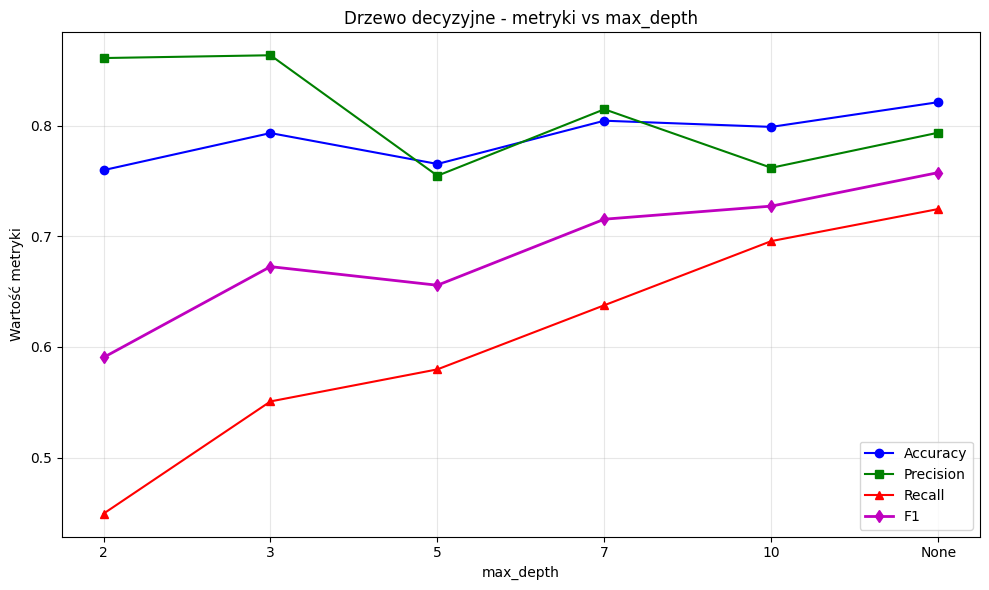


--- Wizualizacja najlepszego drzewa ---


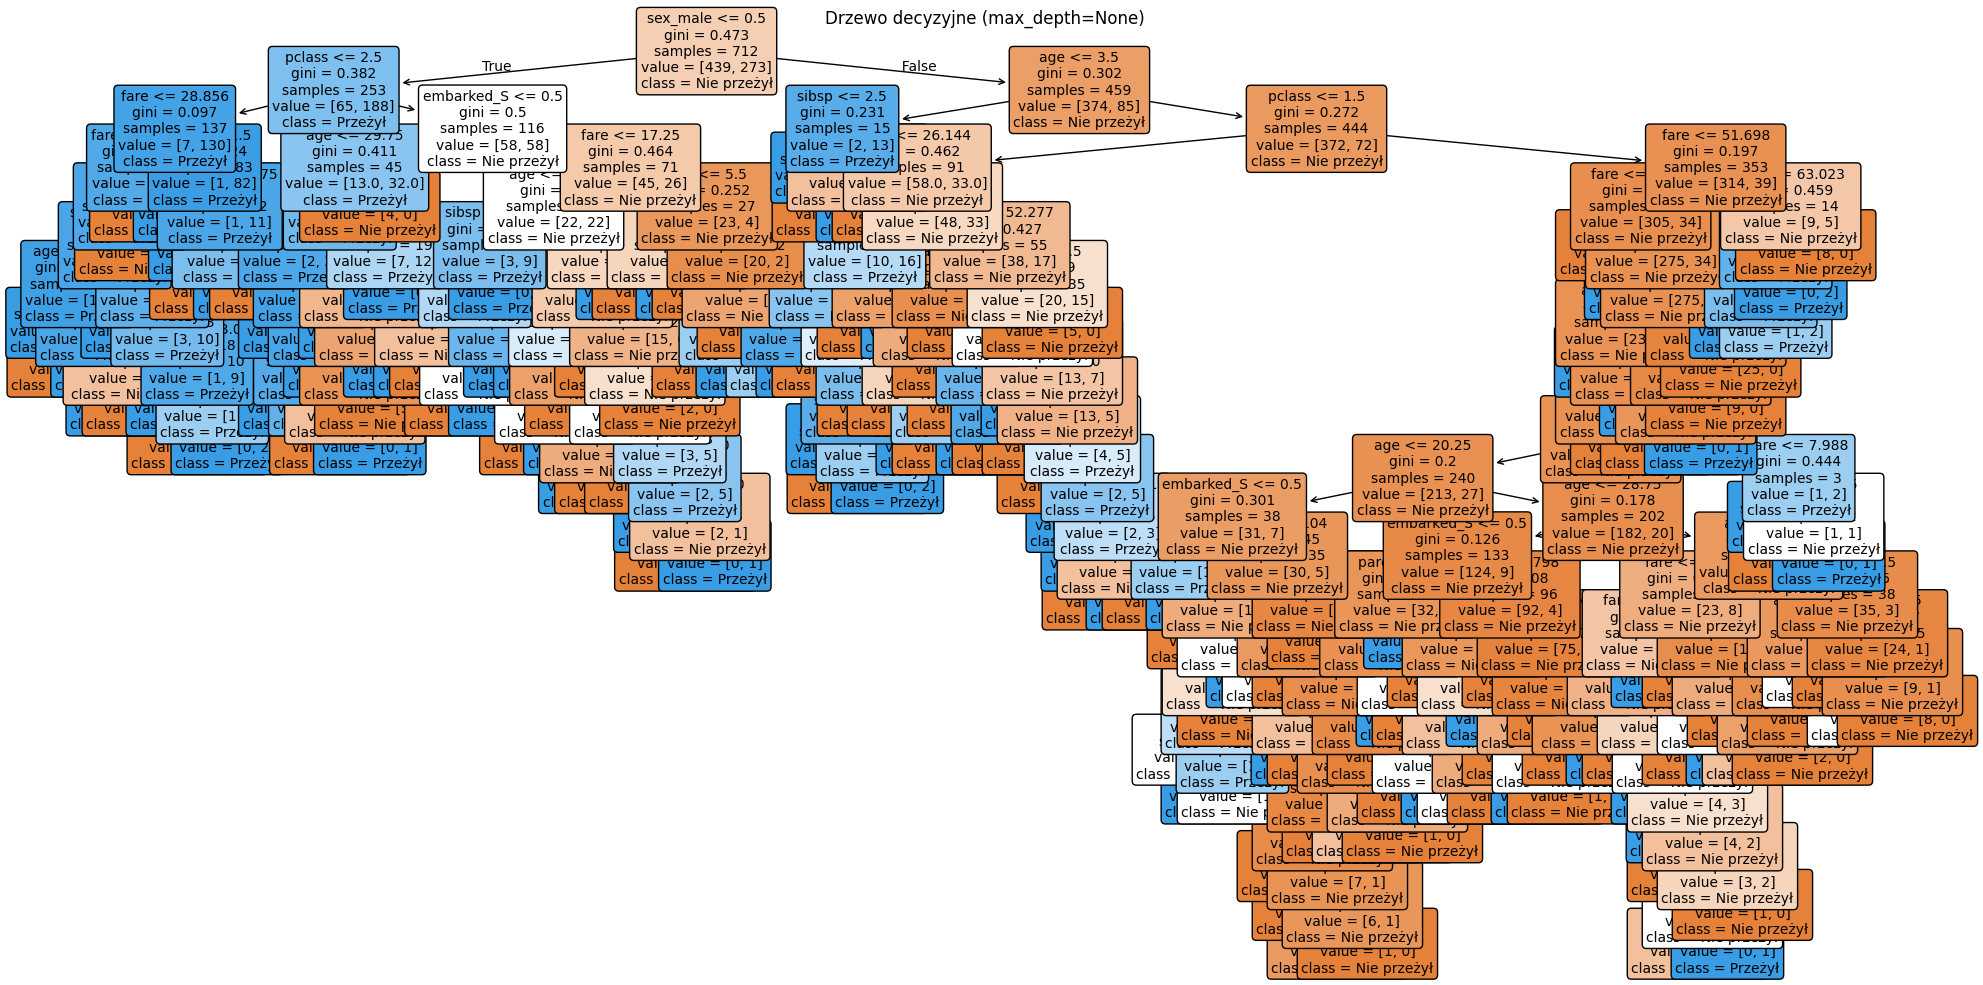


--- Ważność cech (Feature Importance) ---
     Cecha  Ważność
  sex_male 0.316638
       age 0.266991
      fare 0.227918
    pclass 0.110281
embarked_S 0.032651
     parch 0.021010
     sibsp 0.019053
embarked_Q 0.005458

--- Normalizacja cech ---
Dane znormalizowane (fit tylko na train)

--- Wyniki dla różnych k ---
k      Accuracy   Precision  Recall     F1        
----------------------------------------------
1      0.7486     0.6579     0.7246     0.6897    
3      0.8101     0.7536     0.7536     0.7536    
5      0.8156     0.8000     0.6957     0.7442    
7      0.8212     0.7846     0.7391     0.7612    
9      0.8045     0.7931     0.6667     0.7244    
11     0.8045     0.7931     0.6667     0.7244    
15     0.8212     0.8246     0.6812     0.7460    

✓ Optymalne k: 7 (Accuracy = 0.8212)

--- Dlaczego to k jest optymalne? ---

• k=1: Zbyt wrażliwe na szum (overfitting) - klasyfikacja na podstawie 1 sąsiada
• k bardzo duże: Zbyt uogólnione (underfitting) - uwzględnia zbyt

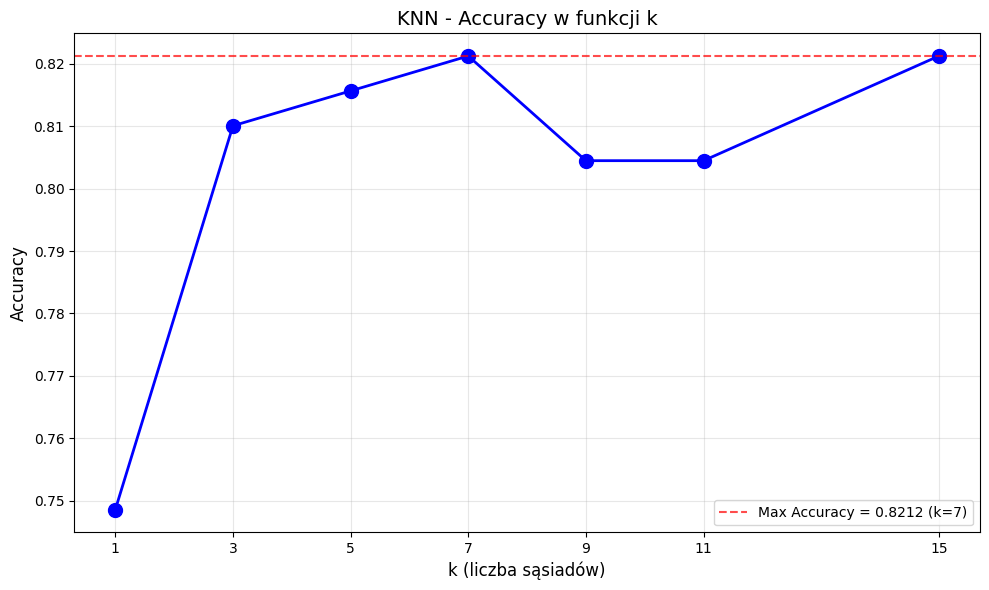

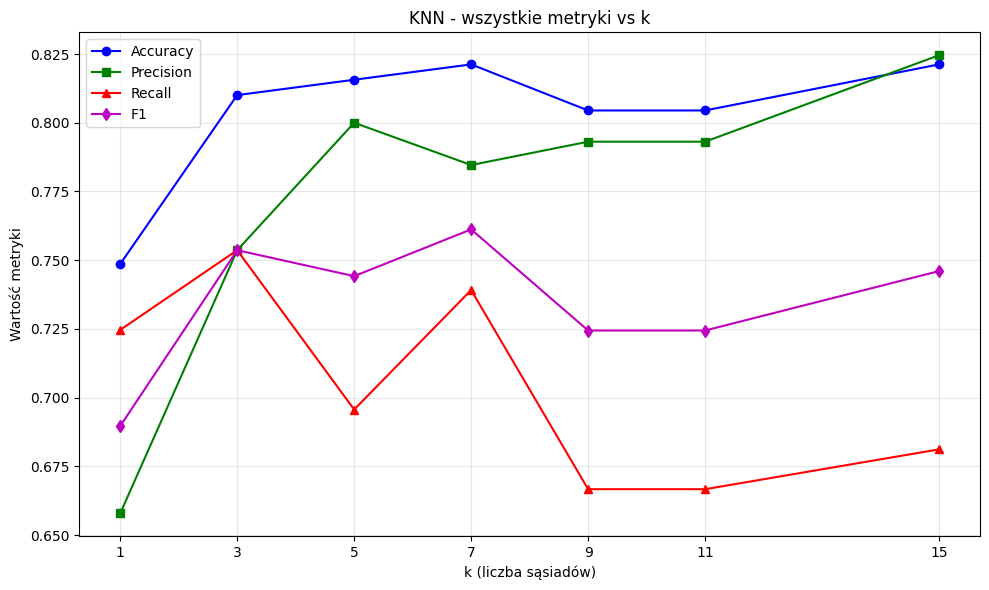


Metryka      Drzewo (depth={best_depth_val}) KNN (k={best_k})    
---------------------------------------------------------
Accuracy     0.8212                    0.8212               =
Precision    0.7937                    0.7846               ◄ Drzewo
Recall       0.7246                    0.7391               ◄ KNN
F1           0.7576                    0.7612               ◄ KNN

DRZEWO DECYZYJNE: 
• Najlepszy max_depth: None
• Accuracy: 0.8212
• F1-score: 0.7576
• Zaleta: Interpretowalność - widać reguły decyzyjne
• Najważniejsze cechy: sex_male, age

KNN:
• Optymalne k: 7
• Accuracy: 0.8212
• F1-score: 0.7612
• Wymaga normalizacji danych! 
• Zaleta: Prosty, brak założeń o rozkładzie danych

WNIOSEK: 
• Oba modele osiągają podobną skuteczność (~80% accuracy)
• Drzewo jest bardziej interpretowalne
• KNN wymaga standaryzacji i doboru k

✓ Analiza zakończona!


In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn. model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = sns.load_dataset('titanic')

df_clean = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].copy()

df_clean['age'] = df_clean['age'].fillna(df_clean['age'].median())
df_clean['embarked'] = df_clean['embarked'].fillna(df_clean['embarked']. mode()[0])
df_encoded = pd.get_dummies(df_clean, columns=['sex', 'embarked'], drop_first=True)

print(f"Kolumny:  {list(df_encoded.columns)}")
print(f"Wymiary: {df_encoded.shape}")

X = df_encoded.drop('survived', axis=1)
y = df_encoded['survived']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Train: {X_train.shape[0]}, Test: {X_test. shape[0]}")

# 2. DRZEWO DECYZYJNE - EKSPERYMENTY Z HIPERPARAMETRAMI

max_depths = [2, 3, 5, 7, 10, None]
tree_results = []

print("\n--- Wyniki dla różnych max_depth ---")
print(f"{'max_depth':<12} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10}")
print("-" * 52)

for depth in max_depths:
    # Trenowanie modelu
    tree = DecisionTreeClassifier(max_depth=depth, random_state=42)
    tree.fit(X_train, y_train)

    # Predykcja
    y_pred = tree.predict(X_test)

    # Metryki
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    tree_results.append({
        'max_depth': depth if depth else 'None',
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    })

    depth_str = str(depth) if depth else 'None'
    print(f"{depth_str:<12} {acc: <10.4f} {prec:<10.4f} {rec:<10.4f} {f1:<10.4f}")

# Znajdź najlepszy max_depth (wg F1)
tree_df = pd.DataFrame(tree_results)
best_idx = tree_df['F1']. idxmax()
best_depth = max_depths[best_idx]
best_depth_val = best_depth if best_depth else 'None'

print(f"\n✓ Najlepszy max_depth: {best_depth_val} (F1 = {tree_df. loc[best_idx, 'F1']:.4f})")

print(f"""
WYNIKI:
• max_depth=2,3: Model zbyt prosty (underfitting)
• max_depth=5-7: Dobry kompromis
• max_depth=None:  NAJLEPSZY
• Zbiór Titanic jest stosunkowo mały (712 train) i prosty
• Cechy mają jasne zależności (płeć, klasa = silne predyktory)
• Pełne drzewo nie przeuczyło się znacząco na tym zbiorze
""")

# Wizualizacja wyników drzewa
fig, ax = plt.subplots(figsize=(10, 6))
x_labels = [str(d) if d else 'None' for d in max_depths]
x_pos = range(len(max_depths))

ax.plot(x_pos, tree_df['Accuracy'], 'b-o', label='Accuracy')
ax.plot(x_pos, tree_df['Precision'], 'g-s', label='Precision')
ax.plot(x_pos, tree_df['Recall'], 'r-^', label='Recall')
ax.plot(x_pos, tree_df['F1'], 'm-d', label='F1', linewidth=2)

ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.set_xlabel('max_depth')
ax.set_ylabel('Wartość metryki')
ax.set_title('Drzewo decyzyjne - metryki vs max_depth')
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('01_tree_metrics.png', dpi=150)
plt.show()

# Wizualizacja najlepszego drzewa
print("\n--- Wizualizacja najlepszego drzewa ---")
best_tree = DecisionTreeClassifier(max_depth=best_depth, random_state=42)
best_tree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(best_tree,
          feature_names=X.columns,
          class_names=['Nie przeżył', 'Przeżył'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title(f'Drzewo decyzyjne (max_depth={best_depth_val})')
plt.tight_layout()
plt.savefig('02_best_tree.png', dpi=150, bbox_inches='tight')
plt.show()

# Ważność cech
print("\n--- Ważność cech (Feature Importance) ---")
importance_df = pd.DataFrame({
    'Cecha': X.columns,
    'Ważność': best_tree.feature_importances_
}).sort_values('Ważność', ascending=False)
print(importance_df. to_string(index=False))

# 3. KNN - EKSPERYMENTY Z HIPERPARAMETRAMI

# 3.1 Normalizacja cech (StandardScaler)
print("\n--- Normalizacja cech ---")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Dane znormalizowane (fit tylko na train)")

# 3.2 Eksperymenty z różnymi k
k_values = [1, 3, 5, 7, 9, 11, 15]
knn_results = []

print("\n--- Wyniki dla różnych k ---")
print(f"{'k':<6} {'Accuracy':<10} {'Precision':<10} {'Recall':<10} {'F1':<10}")
print("-" * 46)

for k in k_values:
    # Trenowanie modelu
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    # Predykcja
    y_pred = knn.predict(X_test_scaled)

    # Metryki
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    knn_results.append({
        'k': k,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1': f1
    })

    print(f"{k:<6} {acc:<10.4f} {prec:<10.4f} {rec:<10.4f} {f1:<10.4f}")

# Znajdź optymalne k
knn_df = pd.DataFrame(knn_results)
best_k_idx = knn_df['Accuracy'].idxmax()
best_k = k_values[best_k_idx]

print(f"\n✓ Optymalne k: {best_k} (Accuracy = {knn_df.loc[best_k_idx, 'Accuracy']:.4f})")

print("\n--- Dlaczego to k jest optymalne? ---")
print(f"""
• k=1: Zbyt wrażliwe na szum (overfitting) - klasyfikacja na podstawie 1 sąsiada
• k bardzo duże: Zbyt uogólnione (underfitting) - uwzględnia zbyt wiele sąsiadów
• k={best_k}: Optymalny kompromis - uśrednia wystarczającą liczbę sąsiadów
• Nieparzyste k unika remisów przy klasyfikacji binarnej
""")

# 3.3 Wykres:  Accuracy w funkcji k
plt. figure(figsize=(10, 6))
plt.plot(k_values, knn_df['Accuracy'], 'b-o', linewidth=2, markersize=10)
plt.axhline(y=knn_df['Accuracy'].max(), color='r', linestyle='--', alpha=0.7,
            label=f'Max Accuracy = {knn_df["Accuracy"].max():.4f} (k={best_k})')
plt.xlabel('k (liczba sąsiadów)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('KNN - Accuracy w funkcji k', fontsize=14)
plt. xticks(k_values)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('03_knn_accuracy.png', dpi=150)
plt.show()

# Wykres wszystkich metryk KNN
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(k_values, knn_df['Accuracy'], 'b-o', label='Accuracy')
ax.plot(k_values, knn_df['Precision'], 'g-s', label='Precision')
ax.plot(k_values, knn_df['Recall'], 'r-^', label='Recall')
ax.plot(k_values, knn_df['F1'], 'm-d', label='F1')
ax.set_xlabel('k (liczba sąsiadów)')
ax.set_ylabel('Wartość metryki')
ax.set_title('KNN - wszystkie metryki vs k')
ax.set_xticks(k_values)
ax.legend()
ax.grid(alpha=0.3)
plt.tight_layout()
plt.savefig('04_knn_all_metrics.png', dpi=150)
plt.show()

# 4. PORÓWNANIE MODELI

# Najlepsze modele
best_tree_metrics = tree_df.loc[best_idx]
best_knn_metrics = knn_df.loc[best_k_idx]

print(f"\n{'Metryka':<12} {'Drzewo (depth={best_depth_val})':<25} {'KNN (k={best_k})':<20}")
print("-" * 57)
for metric in ['Accuracy', 'Precision', 'Recall', 'F1']:
    tree_val = best_tree_metrics[metric]
    knn_val = best_knn_metrics[metric]
    winner = "◄ Drzewo" if tree_val > knn_val else "◄ KNN" if knn_val > tree_val else "="
    print(f"{metric: <12} {tree_val:<25.4f} {knn_val:<20.4f} {winner}")

# PODSUMOWANIE

print(f"""
DRZEWO DECYZYJNE:
• Najlepszy max_depth: {best_depth_val}
• Accuracy: {best_tree_metrics['Accuracy']:.4f}
• F1-score: {best_tree_metrics['F1']:.4f}
• Zaleta: Interpretowalność - widać reguły decyzyjne
• Najważniejsze cechy: {importance_df.iloc[0]['Cecha']}, {importance_df.iloc[1]['Cecha']}

KNN:
• Optymalne k: {best_k}
• Accuracy: {best_knn_metrics['Accuracy']:.4f}
• F1-score: {best_knn_metrics['F1']:.4f}
• Wymaga normalizacji danych!
• Zaleta: Prosty, brak założeń o rozkładzie danych

WNIOSEK:
• Oba modele osiągają podobną skuteczność (~80% accuracy)
• Drzewo jest bardziej interpretowalne
• KNN wymaga standaryzacji i doboru k
""")

print("✓ Analiza zakończona!")